In [2]:
%pylab inline

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


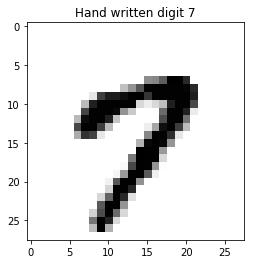

In [3]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

## Assignment 1

In [4]:
import numpy as np
from math import *

def d_infty(a,b):
    return np.amax(np.abs(a-b))
def d_one(a,b):
    return np.sum(np.abs(a-b))
def d_two(a,b):
    return np.sqrt(np.sum((a-b)**2))

## Assignament 2

In [5]:
def dist_matrix(N,dist):
    D=np.zeros((N,N))
    for i in range(N):
        for j in range(i):
            D[i][j]=dist(x_train[i],x_train[j])
    return D + D.T
print(dist_matrix(4,d_infty))

[[0.         1.         1.         0.99215686]
 [1.         0.         1.         1.        ]
 [1.         1.         0.         1.        ]
 [0.99215686 1.         1.         0.        ]]


## Assignament 3

0.15842429299999594


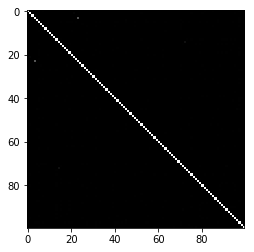

In [6]:
from timeit import default_timer as timer
time1=timer()
Dinfty=dist_matrix(100,d_infty)
Done=dist_matrix(100,d_one)
Dtwo=dist_matrix(100,d_two)
figure()
print(timer()-time1)
imshow(Dinfty,cmap="gray_r")

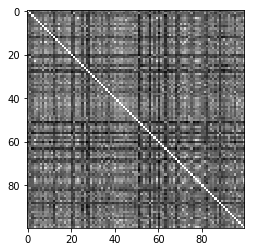

In [7]:
imshow(Done,cmap="gray_r")

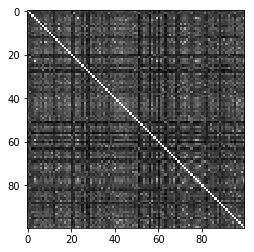

In [8]:
imshow(Dtwo,cmap="gray_r")

## Assignament 4

In [10]:
def err(D):
    error_counter=0
    a=np.amax(D)
    for i in range(len(D[0])):
        D[i,i]=a
        if(y_train[argmin(D[i])]!=y_train[i]):
            error_counter+=1
    return error_counter/size(D[0])
        
                        

## Assignament 5

In [11]:
err_mat=np.zeros((5,5))
time1=timer()
for N,i in zip([100,200,400,800,1600],range(5)):
    
    err_mat[i][0]=err(dist_matrix(N,d_infty))
    err_mat[i][1]=err(dist_matrix(N,d_one))
    err_mat[i][2]=err(dist_matrix(N,d_two))
    
print(err_mat)
print("the execution time is",(timer()-time1))

[[0.58     0.17     0.17     0.       0.      ]
 [0.52     0.145    0.135    0.       0.      ]
 [0.4425   0.15     0.135    0.       0.      ]
 [0.4      0.145    0.12875  0.       0.      ]
 [0.369375 0.1025   0.09375  0.       0.      ]]
the execution time is 59.19475568399997


## Assignment 6


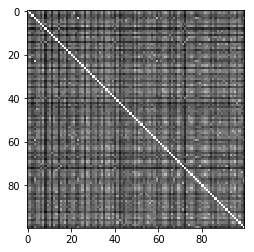

In [19]:
from scipy import integrate
def norm(a):
    return (a/sum(a))
def d_H1(a,b):
    a=norm(a)
    b=norm(b)
    return sqrt(sum(absolute(gradient(a-b))**2 + (a-b)**2))
DH1=dist_matrix(100,d_H1)   
imshow(DH1,cmap='gray_r')

In [13]:
time1=timer()
for N,i in zip([100,200,400,800,1600],range(5)):
    err_mat[i][3]=err(dist_matrix(N,d_H1))
print("execution time:",timer()-time1)    

execution time: 183.66807393300002


In [14]:
print(err_mat)

[[0.58     0.17     0.17     0.22     0.      ]
 [0.52     0.145    0.135    0.15     0.      ]
 [0.4425   0.15     0.135    0.1375   0.      ]
 [0.4      0.145    0.12875  0.11625  0.      ]
 [0.369375 0.1025   0.09375  0.09375  0.      ]]


## Assignment 7


In [15]:
from scipy.sparse import *
from scipy.sparse.linalg import *
from scipy.sparse import csc_matrix

def laplacian(N):
    A = diags([-1,-1,4,-1,-1], [-N,-1, 0, 1,N], shape=(N*N,N*N)).toarray()
    for i in range(1,N):
        A[i*N,(i*N)-1] = 0
        A[(i*N)-1,i*N] = 0
    return A

def LU(N):    # compact representation of sparse matrices--> witout this there would be a warning
    return splu(csc_matrix(laplacian(N)))
A = LU(len(x_train[0]) - 2 )  
def resolve(train):
    train = train[1:-1,1:-1]
    lun = len(train)
    train = train.reshape(-1)
    v = A.solve(train)
    v = v.reshape(lun,lun)
    sol = zeros((28,28))
    sol[1:-1,1:-1]=v
    
    return sol

In [16]:
def grad_norm(f):
    grad = gradient(f)
    return  grad[0]**2 + grad[1]**2

def d_MA(f1,f2):
    a = f1/sum(f1)
    b = f2/sum(f2)
    phi = resolve(a-b)
    func = (a+b)*grad_norm(phi)
    return sum(func)

In [17]:
time1=timer()
for N,i in zip([100,200,400,800,1600],range(5)):
    err_mat[i][4]=err(dist_matrix(N,d_MA))
print(err_mat)
print("execution time:",timer()-time1)

[[0.58     0.17     0.17     0.22     0.24    ]
 [0.52     0.145    0.135    0.15     0.2     ]
 [0.4425   0.15     0.135    0.1375   0.145   ]
 [0.4      0.145    0.12875  0.11625  0.12875 ]
 [0.369375 0.1025   0.09375  0.09375  0.12125 ]]
execution time: 430.64595946000003
